In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy.stats as sts

In [2]:
#Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the ride data fi
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Check to see if the dataset has null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#Check if the number of drivers in a city is a numerical data type
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Check the unique values in the type column
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Find the number of each entry in the type column
city_data_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [10]:
#Inspect the  ride data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
#Check if the fare and ride_id is a numerical data type
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#Merge teh two datasets
pyber_data_df = pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [14]:
#create a bubble chart that showcases the average fare versus the total number of rides 
#with bubble size based on the average number of drivers for each city type: urban, suburban, and rural.

In [15]:
#Urban cites dataframe
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#Suburban cities dataframe
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
#Rural cities dataframe
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# Get total number of rides for each city for each city type
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [19]:
#Get the average fare for each city for each city type
urban_avg_fare = urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare = rural_cities_df.groupby('city').mean()['fare']

In [20]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby('city').mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count = rural_cities_df.groupby('city').mean()['driver_count']

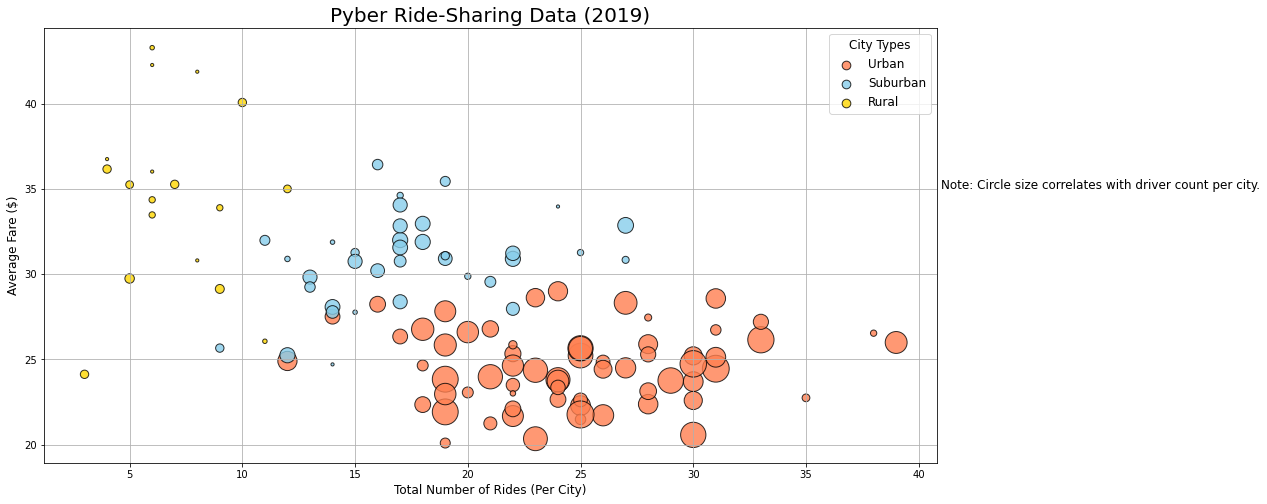

In [21]:
# Build the scatter plots for urban cities.
fig1 = plt.figure(figsize=(16,8))
plt.scatter(urban_ride_count,urban_avg_fare,
            s=[i*10 for i in urban_driver_count],
            alpha =0.8, c='coral',
            edgecolors='black', label='Urban')

# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=[i*10 for i in suburban_driver_count],
            alpha =0.8, c='skyblue',
            edgecolors='black', label='Suburban')

# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count,rural_avg_fare,
            s=[i*10 for i in rural_driver_count],
            alpha =0.8, c='gold',
            edgecolors='black', label='Rural')

plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.ylabel('Average Fare ($)',fontsize=12)
plt.title('Pyber Ride-Sharing Data (2019)',fontsize=20)
plt.grid(True)

#Legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(41, 35, 
         "Note: Circle size correlates with driver count per city.", 
         fontsize="12",wrap=True)

# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.show()


In [22]:
#Get summary statistics of urban cities
urban_cities_df.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [23]:
#Get summary statistics of suburban cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [24]:
#Get summary statistics of rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [25]:
#Get summary statistics of urban cities ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [26]:
#Get summary statistics of suburban cities ride count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
#Get summary statistics of rural cities ride count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [29]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [30]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [31]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [32]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [33]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [34]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [35]:
#Get the fares for urban cities
urban_fares = urban_cities_df['fare']

In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
suburban_fares = suburban_cities_df['fare']
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [38]:
# Calculate the measures of central tendency for the average fare for the rural cities.
rural_fares = rural_cities_df['fare']
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [39]:
# Calculate the measures of central tendency for the driver counts for the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers_mean = np.mean(urban_drivers)
print(f'The mean driver count for urban cities is {urban_drivers_mean:.0f}.')

urban_drivers_median= np.median(urban_drivers)
print(f'The median driver count for urban cities is {urban_drivers_median:.0f}.')

urban_drivers_mode = sts.mode(urban_drivers)
print(f'The mode driver count for urban cities is {urban_drivers_mode}.')

The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [40]:
# Calculate the measures of central tendency for the driver counts for the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers_mean = np.mean(suburban_drivers)
print(f'The mean driver count for suburban cities is {suburban_drivers_mean:.0f}.')

suburban_drivers_median= np.median(suburban_drivers)
print(f'The median driver count for suburban cities is {suburban_drivers_median:.0f}.')

suburban_drivers_mode = sts.mode(suburban_drivers)
print(f'The mode driver count for suburban cities is {suburban_drivers_mode}.')

The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [41]:
# Calculate the measures of central tendency for the driver counts for the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers_mean = np.mean(rural_drivers)
print(f'The mean driver count for rural cities is {rural_drivers_mean:.0f}.')

rural_drivers_median= np.median(rural_drivers)
print(f'The median driver count for rural cities is {rural_drivers_median:.0f}.')

rural_drivers_mode = sts.mode(rural_drivers)
print(f'The mode driver count for rural cities is {rural_drivers_mode}.')

The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


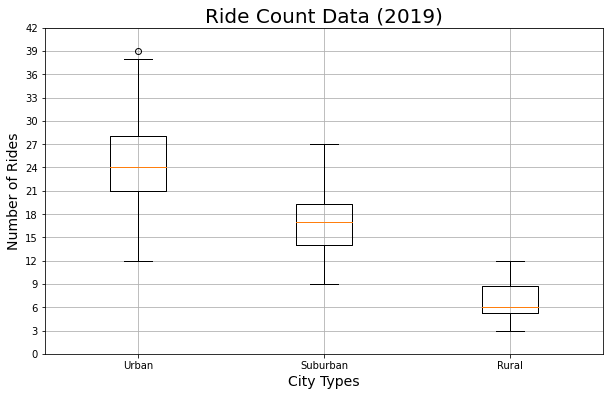

In [42]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Analysis/Fig2.png")
plt.show()


In [43]:
# Get the city that matches the outlier above
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


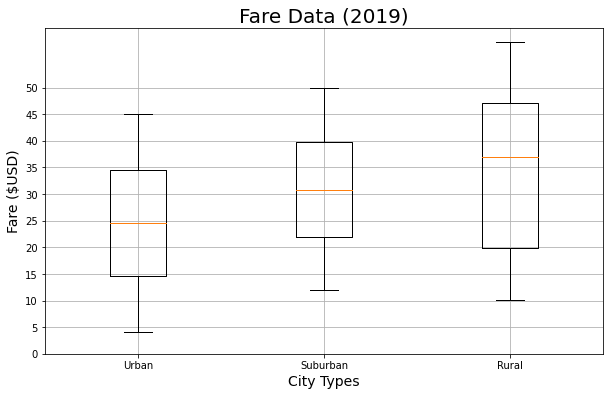

In [44]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ['Urban', 'Suburban', 'Rural']
fig,ax = plt.subplots(figsize=(10,6))
fare_data = [urban_fares,suburban_fares,rural_fares]
ax.boxplot(fare_data,labels=x_labels)
ax.set_title('Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0,51,5))
ax.grid()
# Save the figure.
plt.savefig("Analysis/Fig3.png")
plt.show()

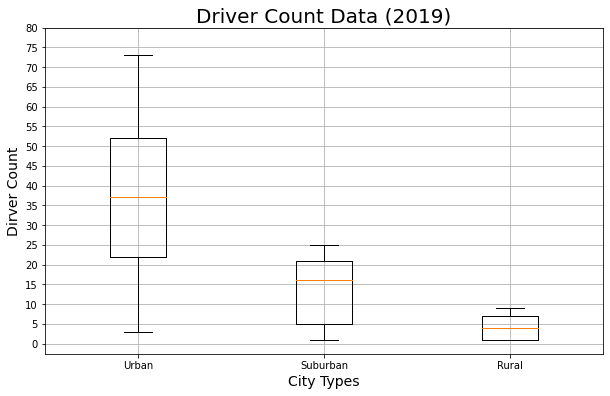

In [45]:
# Add all driver count data box-and-whisker plots to the same graph.
fig,ax = plt.subplots(figsize=(10,6))
xlabels = ['Urban','Suburban','Rural']
driver_count_data=[urban_drivers,suburban_drivers,rural_drivers]
ax.boxplot(driver_count_data,labels=xlabels)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Dirver Count',fontsize=14)
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_yticks(np.arange(0,85,5))
ax.grid()
#Save the figure
plt.savefig('Analysis/Fig4.png')
plt.show()

In [46]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby('type').sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [47]:
# Get the sum of all the fares.
total_fares  = pyber_data_df['fare'].sum()

In [48]:
type_percents = sum_fares_by_type/total_fares*100

In [49]:
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

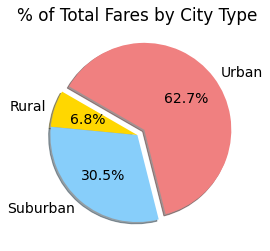

In [60]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
        labels=['Rural','Suburban','Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 12
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [54]:
# Calculate the percentage of rides for each city type.
ride_percents = 100*pyber_data_df.groupby('type').count()['ride_id']/pyber_data_df['ride_id'].count()

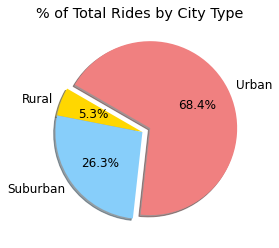

In [61]:
plt.pie(ride_percents,labels=['Rural','Suburban','Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,startangle=150)
plt.title('% of Total Rides by City Type ')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size']=12
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [63]:
driver_percents = 100*city_data_df.groupby('type').sum()['driver_count']/city_data_df['driver_count'].sum()

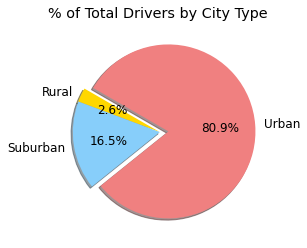

In [64]:
plt.pie(driver_percents,labels=['Rural','Suburban','Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True,startangle=150)
plt.title('% of Total Drivers by City Type ')
# Change the default font size from 10 to 14.
mpl.rcParams['font.size']=12
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()